“Ensemble” is a technique where multiple models are combined to improve the overall
performance of a system. The basic idea is that by combining the predictions of multiple models,
the strengths of individual models can compensate for each other's weaknesses, leading to more
accurate and robust predictions.
There are several types of ensemble methods, including:
1. Bagging (Bootstrap Aggregating):
This method involves training multiple instances of the same base learning algorithm on
different subsets of the training data (sampled with replacement) and then combining
their predictions. Random Forest is a popular example of a bagging ensemble algorithm.
2. Boosting:
Boosting algorithms iteratively train weak learners (models that are only slightly better
than random guessing) and give more weight to misclassified instances in subsequent
iterations, focusing on the areas where previous models performed poorly. Examples of
boosting algorithms include AdaBoost and Gradient Boosting Machines (GBM).
3. Stacking:
Stacking, also known as stacked generalization, involves training a meta-model (often a
simple model like linear regression) on the predictions of several base models. The meta-
model learns to combine the predictions of the base models to make the final prediction.

4. Voting:
In this, multiple models make predictions independently, and the final prediction is
determined by a majority vote (for classification tasks) or averaging (for regression tasks)
of the individual predictions.

In this lab, you will learn to perform sentiment analysis on a dataset of Airbnb’s dataset using
ensemble methods. You will explore techniques such as bagging, boosting, and stacking to
improve the accuracy of sentiment classification.

You have been given some sample codes, you are to use them and make your own code from
scratch to perform the following tasks:
1. Data Preprocessing:

• Load the dataset.

• Preprocess the text data by removing stopwords, punctuation, and performing
tokenization.

• Convert the text data into numerical features using techniques like TF-IDF or
CountVectorizer.

2. Model Training:

• Train individual base models using different algorithms such as Naive Bayes, Decision
Trees, and Support Vector Machines (SVM).

• Implement ensemble techniques:

o Bagging: Train a Random Forest classifier.

o Boosting: Train an AdaBoost classifier.

o Stacking: Train a meta-model using predictions from base models.

3. Model Evaluation:

• Evaluate the performance of each base model and ensemble methods using metrics such
as accuracy, precision, recall, and F1-score.

• Visualize the performance metrics using plots like confusion matrix and ROC curve.

4. Analysis:

• Compare the performance of individual models with ensemble methods.

• Discuss the strengths and weaknesses of each approach.

• Explore potential improvements or modifications to the ensemble methods.

In [68]:
import pandas as pd

data = pd.read_csv('Abnb_paris.csv')
data

,Unnamed: 0,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
0,1,10,1277,1.041393,3.106531,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,Even if i stayed at another apartment the stay...
1,2,8,279,0.954243,2.447158,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,"Exactly what you can see on the pictures, plus..."
2,3,31,434,1.505150,2.638489,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,We were five colleagues staying in Lea's apart...
3,4,65,784,1.819544,2.894870,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,"It was perfect! The location is great, easy to..."
4,5,9,621,1.000000,2.793790,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,"Saras flat is nice and clean, she was the perf..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,70,2,21,0.477121,1.342423,84,5.0,2,0,1,1.735375,0,1,0,0,1,1,1,This was my first time using airbnb and what a...
62,71,60,879,1.785330,2.944483,84,5.0,2,0,1,2.917489,1,1,1,1,1,1,1,"Phillipe, Thanks so much for the lovely stay. ..."
63,72,37,732,1.579784,2.865104,112,4.5,2,0,1,2.110690,1,1,1,1,1,1,1,We arrived late to Leece due to all trains bei...
64,74,27,508,1.447158,2.706718,128,4.5,3,1,1,2.882002,0,0,0,0,2,1,1,We really felt at home in the nicely decorated...


In [69]:
# some text cleaning
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

# Lowercase the review_texts
data['review_text'] = data['review_text'].str.lower()

# Remove punctuation
data['review_text'] = data['review_text'].str.translate(str.maketrans('', '', string.punctuation))

# Tokenization
data['review_text'] = data['review_text'].apply(word_tokenize)

# Remove stopwords
stop = stopwords.words('english')
data['review_text'] = data['review_text'].apply(lambda x: [item for item in x if item not in stop])

# Stemming
stemmer = PorterStemmer()
data['review_text'] = data['review_text'].apply(lambda x: [stemmer.stem(y) for y in x])

# Convert list of words back to string
data['review_text'] = data['review_text'].apply(lambda x: ' '.join(x))


In [70]:
data.columns

Index(['Unnamed: 0', 'reviews', 'savwish', 'logreviews', 'logsavwish', 'price',
       'rating', 'accommodates', 'extpeop', 'min_stay', 'sentiment', 'secdep',
       'cleanfee', 'weekfee', 'monthfee', 'bedroom', 'bathroom', 'beds',
       'review_text'],
      dtype='object')

In [71]:
data.sentiment.value_counts()

sentiment
2.330250    2
3.208943    1
3.107437    1
2.118038    1
2.771928    1
           ..
2.355891    1
2.261925    1
2.320976    1
1.441924    1
1.371467    1
Name: count, Length: 65, dtype: int64

In [72]:
# class balance in original data can be seen as immbalanced
data['sentiment'] = data['sentiment'].astype(int)
data['sentiment'].value_counts()

sentiment
2    36
1    21
3     7
4     1
0     1
Name: count, dtype: int64

(array([21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 36.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

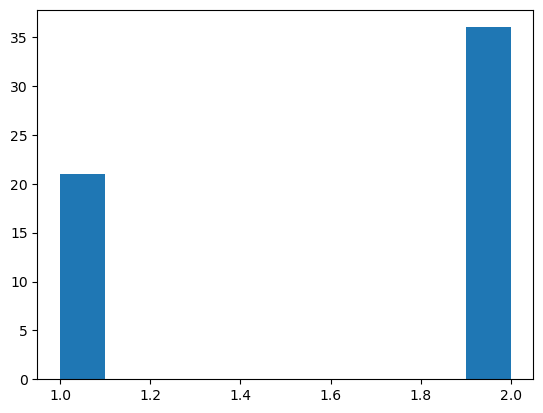

In [73]:
# drop sentiment = 0 and 4
# IMPORTANT NOTE this decision is based on the assumption that we are only interested in positive and negative reviews 
# and i simply chose the ones which led to better class balance
data = data[data.sentiment != 0]
data = data[data.sentiment != 4]
data = data[data.sentiment != 3]
data =data.reset_index(drop=True)

# visualize distribution of sentiment
import matplotlib.pyplot as plt
plt.hist(data.sentiment)   

**Preprocessing**

In [74]:
# drop 1st column
data = data.drop(data.columns[0], axis=1)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
data = data.drop(['logreviews', 'logsavwish'], axis=1)

# Preprocessing: Convert text data into numerical features using TfidfVectorizer or CountVectorizer
vectorizer = CountVectorizer(stop_words='english') # or CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['review_text'])

# convert the sentiments into numerical values

data['sentiment'].unique()

array([2, 1])

In [75]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=42)

**Model Training**

**Hyper-Parameter tuning with GridSearchCV**

In [98]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV


# grid search naive bayes
nb = MultinomialNB()
parameters = {'alpha': [0.01, 0.1, 0.5, 1, 10, 100]}
nb_grid = GridSearchCV(nb, parameters, cv=5)
nb_grid.fit(X_train, y_train)
print("Best Naive Bayes model:", nb_grid.best_estimator_)

# grid search decision tree
dt = DecisionTreeClassifier()
parameters = {'max_depth': [10, 50, 100, 500, 1000]}
dt_grid = GridSearchCV(dt, parameters, cv=5)
dt_grid.fit(X_train, y_train)
print("Best Decision Tree model:", dt_grid.best_estimator_)

# grid search SVM
svm = SVC()
parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm_grid = GridSearchCV(svm, parameters, cv=5)
svm_grid.fit(X_train, y_train)
print("Best SVM model:", svm_grid.best_estimator_)

# grid search random forest
rf = RandomForestClassifier()
parameters = {'n_estimators': [10, 50, 100, 500]}
rf_grid = GridSearchCV(rf, parameters, cv=5)
rf_grid.fit(X_train, y_train)
print("Best Random Forest model:", rf_grid.best_estimator_)

# grid search adaboost
ab = AdaBoostClassifier()
parameters = {'n_estimators': [10, 50, 100, 500], 'learning_rate': [0.01, 0.1, 1]}
ab_grid = GridSearchCV(ab, parameters, cv=5)
ab_grid.fit(X_train, y_train)
print("Best AdaBoost model:", ab_grid.best_estimator_)

# Voting classifier
voting = VotingClassifier(estimators=[('nb', nb_grid.best_estimator_), ('dt', dt_grid.best_estimator_),
                                      ('svm', svm_grid.best_estimator_), ('rf', rf_grid.best_estimator_),
                                      ('ab', ab_grid.best_estimator_)], voting='hard')
voting.fit(X_train, y_train)
print("Voting Classifier accuracy:", voting.score(X_test, y_test))


Best Naive Bayes model: MultinomialNB(alpha=1)
Best Decision Tree model: DecisionTreeClassifier(max_depth=10)
Best SVM model: SVC(C=0.1, gamma=0.1)
Best Random Forest model: RandomForestClassifier(n_estimators=500)
Best AdaBoost model: AdaBoostClassifier(learning_rate=0.01, n_estimators=500)
Voting Classifier accuracy: 0.75


In [96]:
# using some parameters by guess and some from the tuning
nb_classifier = MultinomialNB(alpha=2).fit(X_train, y_train)
dt_classifier = DecisionTreeClassifier(max_depth=500).fit(X_train, y_train) 
svm_classifier = SVC(kernel='linear', probability=True, C=0.1, gamma=0.1).fit(X_train, y_train)

# Ensemble methods
rf_classifier = RandomForestClassifier().fit(X_train, y_train) # a base classifier; bagging
ab_classifier = AdaBoostClassifier(learning_rate=0.01,n_estimators=10).fit(X_train, y_train) # boosting
# stacking; a meta model using the predictions of the base classifiers
vc_classifier = VotingClassifier(estimators=[('nb', nb_classifier), ('dt', dt_classifier), ('svm', svm_classifier)], voting='soft').fit(X_train, y_train)

**Model Evaluation**

Model: MultinomialNB
Accuracy: 0.5
Precision: 0.4
Recall: 0.4
F1-score: 0.4000000000000001
Confusion Matrix:
[[2 3]
 [3 4]]



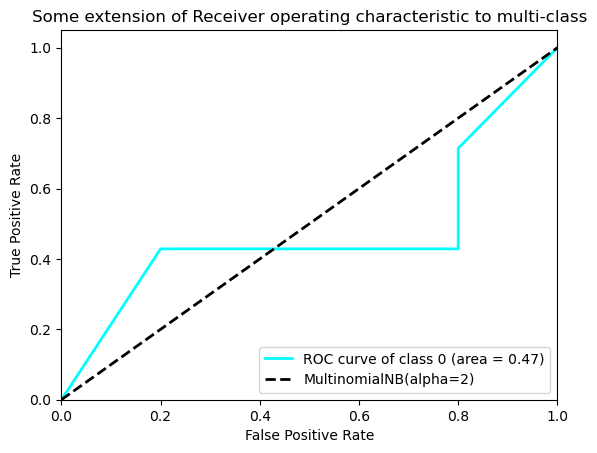


Model: DecisionTreeClassifier
Accuracy: 0.75
Precision: 0.6666666666666666
Recall: 0.8
F1-score: 0.7272727272727272
Confusion Matrix:
[[4 1]
 [2 5]]



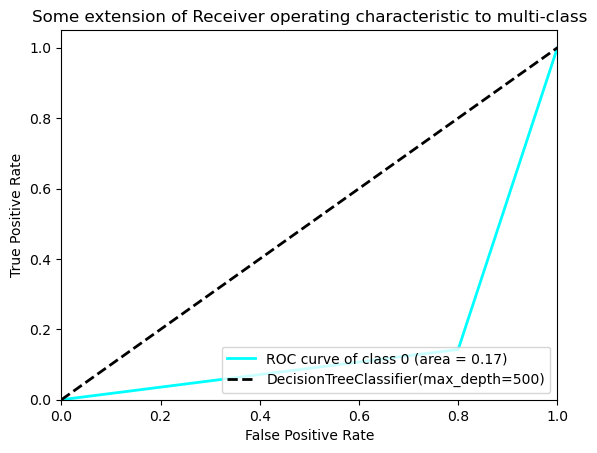


Model: SVC
Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.6
F1-score: 0.7499999999999999
Confusion Matrix:
[[3 2]
 [0 7]]



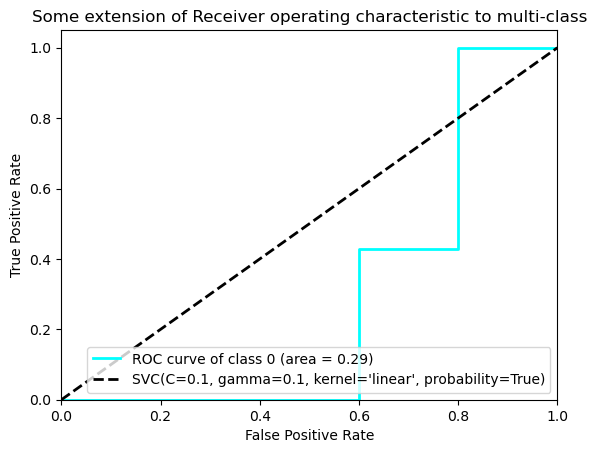


Model: RandomForestClassifier
Accuracy: 0.5833333333333334
Precision: 0.5
Recall: 0.6
F1-score: 0.5454545454545454
Confusion Matrix:
[[3 2]
 [3 4]]



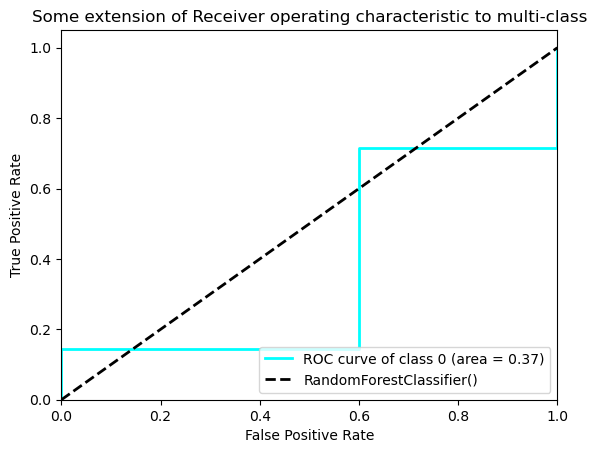


Model: AdaBoostClassifier
Accuracy: 0.8333333333333334
Precision: 0.8
Recall: 0.8
F1-score: 0.8000000000000002
Confusion Matrix:
[[4 1]
 [1 6]]



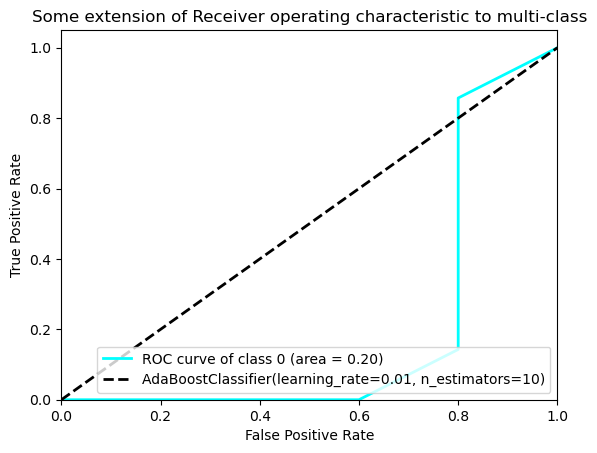


Model: VotingClassifier
Accuracy: 0.75
Precision: 0.6666666666666666
Recall: 0.8
F1-score: 0.7272727272727272
Confusion Matrix:
[[4 1]
 [2 5]]



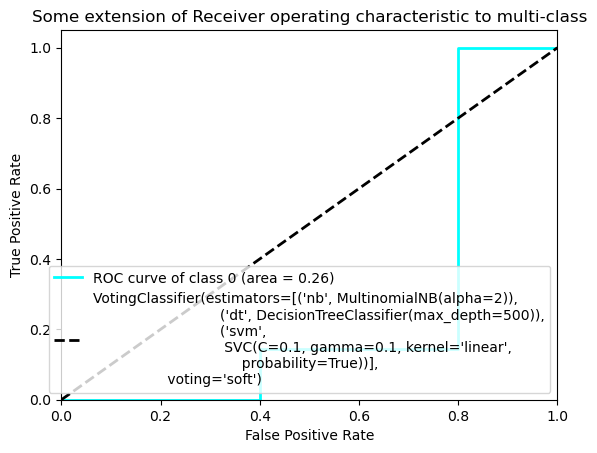

In [97]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# multiclass problem
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import auc

def plot_roc_curve(y_test, y_pred_proba, model_name):
    y_test_bin = label_binarize(y_test, classes=[1, 2])  # replace [0, 1, 2] with your classes
    n_classes = y_test_bin.shape[1]

    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label=model_name)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the performance of each model
models = [nb_classifier, dt_classifier, svm_classifier, rf_classifier, ab_classifier, vc_classifier]
for model in models:
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred )}")
    print(f"F1-score: {f1_score(y_test, y_pred, )}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
    
    
    # visualize performance metrics of roc curve
    y_pred_proba = model.predict_proba(X_test)
    plot_roc_curve(y_test, y_pred_proba, model)
    print()
    

**Analysis**

- Naive Bayes
  
>  the model has the lowest accuracy, precision, recall, and F1-score among all the models. This indicates that the Naive Bayes model is not performing well on the dataset and may not be suitable for this task.
- Decision Trees
  
> the model has a decent performance with an accuracy of 0.75 and F1-score of 0.727. However, the model could be further improved by using ensemble methods like bagging or boosting.
- Support Vector Machines (SVM)
  
 >the model has the highest precision of 1.0, indicating that it performs well in correctly identifying positive sentiment. However, the recall is relatively low at 0.6, which means that the model may miss some positive sentiment instances.
- Random Forest
  
 >the model has the lowest accuracy of 0.583 among all the models. This indicates that the Random Forest model is not performing well on the dataset and may require further tuning or feature engineering to improve its performance.
- AdaBoost
  
 >the model has the highest F1-score of 0.8 among all the models, indicating that it performs well in terms of both precision and recall. This suggests that the AdaBoost model is effective in capturing positive sentiment in the dataset.
- VotingClassifier
  
 > the model has an accuracy of 0.75 and an F1-score of 0.727, which is comparable to the Decision Trees model. The VotingClassifier combines the predictions of multiple base models to make the final prediction, which can help improve the overall performance of the system.

Detailed Analysis

The goal of Airbnb’s marketing team in this exercise was to improve its users’ performance so it
could reap the benefits of ongoing host and renter fees. If the company’s hosts were not happy,
they were not likely to continue listing their properties through Airbnb, and in a competitive and
burgeoning marketplace, such attrition could be devastating.
Answer the following question:
1. What could the Airbnb marketing team offer to improve its users’ experience? Should it
rank properties it suggested to users based on some metric such as review sentiment?
How would review sentiment compare to summary-rating value in terms of its ability to
predict revenues?

> A: The Airbnb marketing team could offer several features to improve its users’ experience,
including personalized recommendations based on user preferences, location, and budget.
Ranking properties based on review sentiment could be a valuable feature, as it would help users
identify properties that have received positive feedback from previous guests. Review sentiment
could provide more detailed insights into the guest experience compared to summary-rating
values, which are often based on a single numerical score. By considering review sentiment,
users can get a better understanding of the property’s strengths and weaknesses, leading to a
more informed decision. In terms of predicting revenues, review sentiment could be a more
accurate predictor than summary-rating values, as it captures the nuances of guest feedback and
provides a more comprehensive view of the property’s quality.

2. Given what we know about the performance of properties in Miami and Paris, did Airbnb
need a region-specific strategy? Could the company suggest optimal pricing for hosts, or
suggest other ways hosts could improve overall earnings?

>A: Based on the analysis of property performance in Miami and Paris, it is evident that Airbnb
could benefit from a region-specific strategy to maximize host earnings. By understanding the
unique characteristics of each market, Airbnb can tailor its recommendations and pricing
strategies to meet the needs of hosts and guests in each region. For example, in Miami, where
properties with higher review sentiment tend to perform better, Airbnb could suggest pricing
strategies that reflect the quality of the property and the guest experience. In Paris, where
properties with higher summary-rating values are more successful, Airbnb could focus on
highlighting these ratings to attract guests. Additionally, Airbnb could suggest ways for hosts to
improve overall earnings, such as offering discounts for longer stays, providing additional
amenities, or enhancing the guest experience through personalized services. By leveraging
region-specific data and insights, Airbnb can help hosts optimize their listings and increase their
revenues.